In [1]:
import keras
from keras.layers import SimpleRNN, Embedding, Dense
from keras.models import Sequential


In [2]:

model = Sequential()
model.add(Embedding(10000, 32)) # Assuming a vocabulary size of 10000 and embedding dimension of 32
model.add(SimpleRNN(32,return_sequences=True)) # 32 RNN units
model.add(Dense(1, activation='sigmoid')) # Output layer for binary classification (e.g., sentiment analysis)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [3]:


import numpy as np
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense

# Number of words to consider as features
max_features = 10000
# Cut texts after this number of words
maxlen = 500

# Load the IMDB dataset
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

# Pad sequences to a fixed length
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

# Build the model
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))  # You can change the number of RNN units here
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

# Train the model
history = model.fit(input_train, y_train,
                    epochs=10,  # You can adjust the number of epochs
                    batch_size=128,
                    validation_split=0.2)

25000 train sequences
25000 test sequences
input_train shape: (25000, 500)
input_test shape: (25000, 500)
Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 13s 70ms/step - acc: 0.6201 - loss: 0.6316 - val_acc: 0.7130 - val_loss: 0.6108
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 10s 63ms/step - acc: 0.8258 - loss: 0.4040 - val_acc: 0.8304 - val_loss: 0.4372
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 10s 62ms/step - acc: 0.8691 - loss: 0.3211 - val_acc: 0.8482 - val_loss: 0.3852
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 10s 62ms/step - acc: 0.8875 - loss: 0.2747 - val_acc: 0.8624 - val_loss: 0.3451
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 10s 63ms/step - acc: 0.9203 - loss: 0.2124 - val_acc: 0.8188 - val_loss: 0.4571
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 10s 62ms/step - acc: 0.9332 - loss: 0.1810 - val_acc: 0.8550 - val_loss: 0.4309
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 10s 63ms/step - acc: 0.9520 - loss: 0.1333 - val_acc: 0.8056 - val_loss: 0.5107
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 10s 63ms/step 

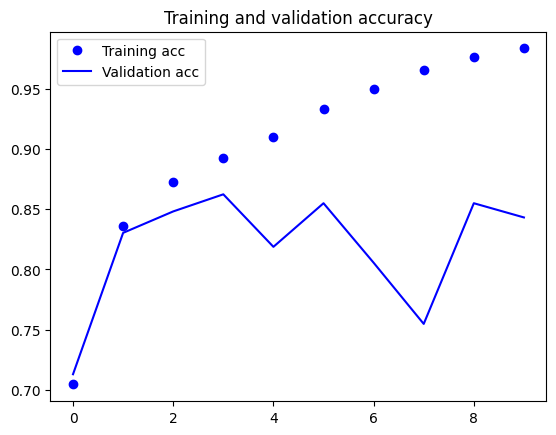

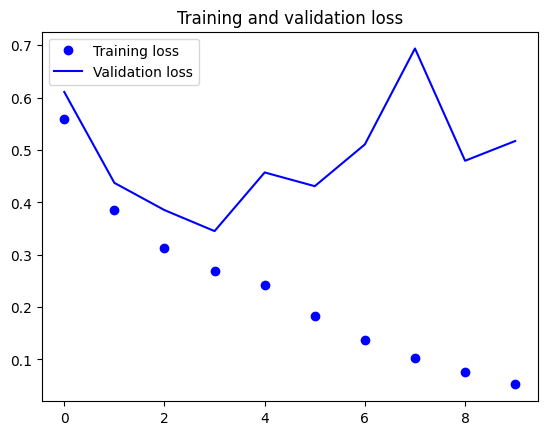

In [5]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()